# Directed Search: Scenario discovery & trade-off analysis

Scenario discovery and trade-off analysis are used to detect the vulnerabilities of candidate solutions. Patient Rule Induction Method (PRIM) is used to identify policy vulnerabilities. For this analysis the results of the uncertainty analysis model simulation is used. In this simulation, the 9 policies of interest are evaluated under 5000 scenarios.



In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt


In [2]:
from SALib.analyze.sobol import analyze

### Importing results

In [3]:
experiments = pd.read_csv('data/output_data/experiments_uncertainty_simulation_5000s.csv')
outcomes = pd.read_csv('data/output_data/outcomes_uncertainty_simulation_5000s.csv')

# 2.? Scenario discovery

## 2.? PRIM

Below scenario discovery has been applied again, just like 1.2.2, using PRIM. It is chosen to focus at the 10% worst outcomes for both the number of expected deaths and the expected annual damage. This means that only 10% of all scenarios with either the highest number of expected deaths or the highest expected annual damage are included.

The PRIM algorithm was used with the default value for the peeling alfa and a value of 0.8 as threshold. 0.8 was chosen after conducting a small sensitivity analysis, which showed that the use of another threshold did not lead to significantly different results


Wel nog iets toevoegen over keuze van box!!
### 2....? Expected Number of Deaths

In [4]:
# Find uncertainty_experiments
# A list has been created of uncertainties in the model
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

#experiments onbekend is nog niet duidelijk welke dataset hier gebruikt wordt.
uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,1.5,1.5,4.5,119,323.428446,0.377191,1.5,131.061323,0.293888,10.0,124.479343,0.306328,1.0,273.991783,0.761013,1.0,265.233231,0.685904,1.5
1,3.5,4.5,3.5,121,167.993621,0.901348,1.0,42.789516,0.288916,10.0,196.810449,0.818037,1.5,150.732121,0.998636,1.0,154.752043,0.517362,1.0
2,3.5,2.5,2.5,82,176.902307,0.485454,1.5,314.770470,0.107622,1.0,198.576705,0.673845,1.5,109.758023,0.669416,10.0,222.357229,0.275681,1.0
3,2.5,2.5,3.5,25,259.339025,0.027976,1.5,117.269882,0.785194,1.0,327.156934,0.952394,1.5,32.924106,0.810848,10.0,173.315665,0.274442,10.0
4,3.5,1.5,4.5,109,179.274614,0.655612,1.0,53.193314,0.737245,1.0,163.865646,0.905633,10.0,184.904937,0.069255,1.0,119.673285,0.695685,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3.5,4.5,3.5,23,132.589527,0.444795,10.0,185.448554,0.965250,1.0,279.006844,0.717771,1.0,68.395770,0.062068,1.0,228.614757,0.423266,1.5
44996,1.5,1.5,2.5,47,225.003940,0.542024,1.0,243.679358,0.344594,1.5,318.874694,0.923207,10.0,291.907879,0.973366,1.0,64.264494,0.952759,1.0
44997,3.5,3.5,1.5,19,55.639644,0.074683,1.5,249.368578,0.668730,1.0,138.086117,0.516068,10.0,58.328495,0.821887,1.5,79.448726,0.272984,1.0
44998,3.5,4.5,1.5,42,101.033240,0.069266,1.0,41.679187,0.639812,10.0,335.528377,0.524703,10.0,337.150714,0.038436,1.0,342.418785,0.413884,1.5


In [5]:
# Juiste outcomes definieren

[MainProcess/INFO] 45000 points remaining, containing 33871 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0582, coverage: 0.07732278350211096, density: 1.0 restricted_dimensions: 6


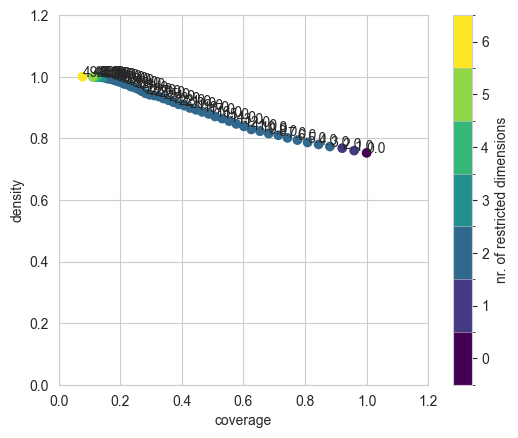

In [6]:
# applying PRIM to the worst outcomes for the expected number of deaths (highest number of deaths)
x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'] > 0.001 #amount of death to be lowest as possible

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff(annotated=True)
plt.show()

coverage     0.110744
density      0.999467
id          48.000000
mass         0.083400
mean         0.999467
res_dim      5.000000
Name: 48, dtype: float64

                            box 48                                
                               min         max  qp value  qp value
A.5_pfail                 0.000185    0.111439       NaN  0.000000
A.2_pfail                 0.000048    0.858091       NaN  0.027663
A.5_Bmax                 30.000290  337.309003       NaN  0.680884
A.3_Bmax                 51.949526  349.961636  0.471721       NaN
A.0_ID flood wave shape   6.000000  132.000000  0.682330       NaN



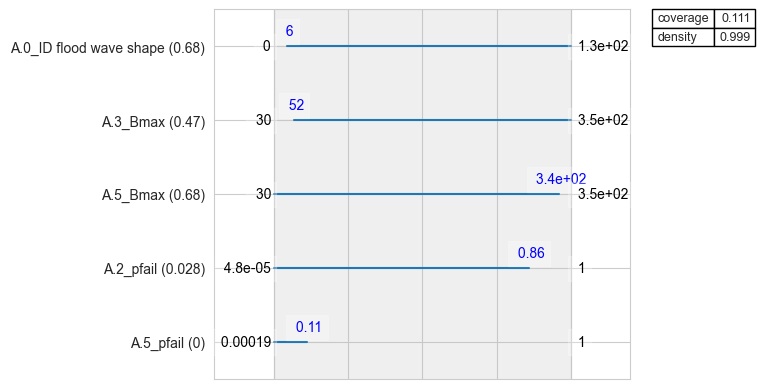

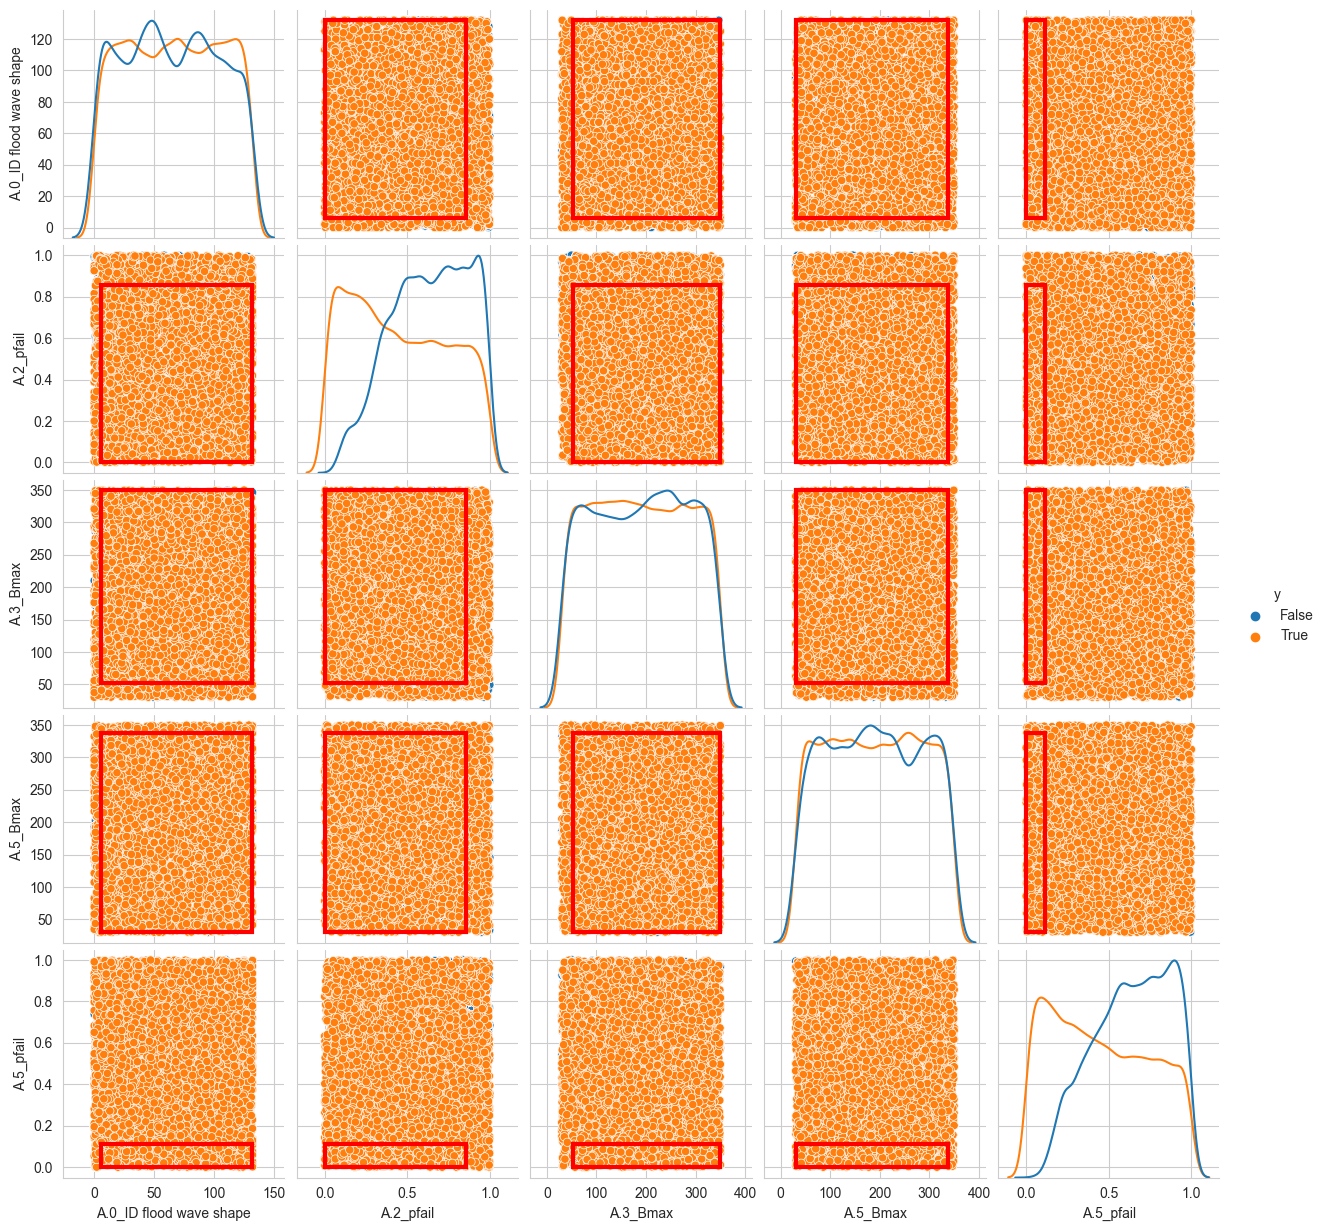

In [ ]:
#Yellow
box1.inspect(48)
box1.inspect(48, style="graph")
box1.show_pairs_scatter(48)
plt.show()

In [ ]:
#green
box1.inspect(20)
box1.inspect(20, style="graph")
box1.show_pairs_scatter(20)
plt.show()

In [ ]:
#Blue
box1.inspect(1)
box1.inspect(1, style="graph")
box1.show_pairs_scatter(1)
plt.show()

als a2 faalt heb je kans van 3/4 dat het dodenaantal boven 0.001 ligt
significant als qp value onder 0.05 ligt

### 2....? Expected Annual Damage

In [ ]:
x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] < np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

#box1.show_tradeoff(annotated=True) # Deze is puur voor visualiseren en weten welk nummer op de grens zit
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
box1.inspect(43)
box1.inspect(43, style="graph")
box1.show_pairs_scatter(43)
plt.show()

In [ ]:
box1.inspect(20)
box1.inspect(20, style="graph")
box1.show_pairs_scatter(20)
plt.show()

# 2.? Trade-off

parcoords.plot() is where each line represents an experiment and the color represents whether it is selected or not. This plot visualizes the trade-offs between different objectives or outcome values.

In [ ]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import parcoords

# Obtain the selected box from PRIM analysis
selected_box = box1

# Perform the trade-off analysis using selected box
data = experiments.loc[selected_box.yi]
data['Selected'] = selected_box.yi

# Visualize the trade-offs using parallel coordinates plot
fig, axes = plt.subplots(figsize=(10, 6))
parcoords.plot(data, ax=axes, color='Selected', colormap='Set1')

# Customize the plot
plt.title('Trade-off Analysis')
plt.xticks(rotation=45)
plt.xlabel('Objectives')
plt.ylabel('Outcome Values')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## SOBOL?

In [ ]:
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [ ]:
problem = get_SALib_problem(dike_model.uncertainties)
problem

In [ ]:
experiments = pd.read_csv('data/output_data/experiments_scenario_discovery_10s_sobol.csv', index_col=None) #OMZETTEN NAAR 20.000
print(f"Shape of data: {experiments.shape[0]} rows, {experiments.shape[1]} columns.")
experiments.head(10)

In [ ]:
results = pd.read_csv('data/output_data/results_scenario_discovery_10s_sobol.csv', index_col=None) #OMZETTEN NAAR 20.000
print(f"Shape of data: {results.shape[0]} rows, {results.shape[1]} columns.")
results.head(10)

In [ ]:
results['Expected Annual Damage'].shape

In [ ]:
sobol_results = {}

for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    y = results.loc[logical,'Expected Annual Damage'].values
    indices = analyze(problem, y)
    sobol_results[policy] = indices

fig, axes = plt.subplots(3,1)
fig.set_size_inches(10, 15)
indices.plot(ax=axes)

The Sobol method is a global sensitivity analysis technique that allows you to assess the relative importance of
input variables (uncertainties) in influencing the output of a model. While you have already selected 9 policies
of interest, the Sobol' analysis can provide valuable insights into the uncertainty and variability associated
with these policies.

Here's why the uncertainty analysis using the Sobol method can still be useful:

## Identifying influential factors:
The Sobol' method quantifies the contribution of each input variable to the output variability. By assessing the sensitivity indices, you can identify which input variables have the most significant impact on the output. This information can help you focus your efforts on the most influential factors and prioritize them in your decision-making process.
### A1_pfail, A2_pfail and A3_pfail are influential factors
## Ranking policies:
While you have selected 9 policies, the Sobol' analysis can help rank these policies based on their performance under different input conditions. It provides insights into how sensitive each policy is to changes in the input variables. By understanding the relative performance and robustness of the policies across different scenarios, you can make informed decisions about their implementation.
## Trade-off analysis:
The Sobol' analysis can help you understand the trade-offs between different objectives and input variables. By assessing the sensitivity indices, you can identify potential interactions and dependencies between input variables and assess the implications for your chosen policies. This can aid in understanding the trade-offs involved and making more informed decisions that consider the uncertainties associated with each policy.
## Robustness assessment:
The Sobol' analysis allows you to assess the robustness of your policies by examining their performance across different input variations. It helps you understand how sensitive your policies are to uncertainties and variations in the input variables. Robust policies exhibit consistent performance even under different scenarios, providing confidence in their effectiveness.
In summary, while you have already selected specific policies of interest, the Sobol' analysis provides valuable insights into the uncertainty and sensitivity of the input variables associated with these policies. It helps you understand the relative importance of different factors, rank the policies, analyze trade-offs, and assess their robustness. These insights can enhance your decision-making process and help you make more informed choices regarding the implementation of the selected policies.

In [ ]:
# Read and view the data
data = pd.read_csv('data/output_data/policies.csv', index_col=None)
print(f"Shape of data: {data.shape[0]} rows, {data.shape[1]} columns.")
data.head(3)

In [ ]:
# Select the experiments
x = data.iloc[:, 2:11] #zelf verzetten naar goede aantal colommen
print(f"Columns in x: {x.columns.values}")

In [ ]:
# Select the outcome
y = data.iloc[:, 15].values #zelfde hiervoor

## Prim

In [ ]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

In [ ]:
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
point = 19
box1.inspect(point)

In [ ]:
box1.inspect(point, style='graph')
plt.show()

In [ ]:
box1.resample(point)

In [ ]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Read and select the data
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7]
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [ ]:
# Peel alpha controls the leniency of the algorithm, the higher, the less lenient
# The meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16,
                     peel_alpha=0.01)
box2 = prim_obj.find_box()

In [ ]:
# Plot the trade-off curve
box2.show_tradeoff(annotated=True)
plt.show()

In [ ]:
# Inspect a specific point on the trade-off curve
box2.inspect(3)
plt.show()